In [38]:
# Import necessary libraries
from google.colab import drive  # Library for connecting to Google Drive
from zipfile import ZipFile
import cv2
import numpy as np
from PIL import Image
import io
from tabulate import tabulate
import warnings
import shutil
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import random


# Define the path to the zip file and the extraction folder
zip_file_path = '/content/drive/MyDrive/002__DISSERTATION/DATASET/images/sample.zip'
extract_folder = 'extracted_content/'


# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Set Display Files after Resize select 3 image files for display
SET_RESIZE = 3
img_rgb = '' ;  resized_img_rgb = '' ; standardized_img_rgb = ''

Mounted at /content/drive


In [51]:
def image_resize(image_path, displayImage):
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Read the image using OpenCV
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

    # Resize the image to 416x416
    resized_img = cv2.resize(img, (416, 416), interpolation=cv2.INTER_NEAREST)
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Standardize the image using scikit-learn's StandardScaler
    standardized_img = scaler.fit_transform(resized_img.reshape(-1, 1)).reshape(416, 416, 3)
    standardized_img_rgb = cv2.cvtColor(np.uint8(standardized_img), cv2.COLOR_BGR2RGB)  # Convert to RGB

    #Display Imaage
    if displayImage == 'Y':

        # Plot original, resized, and standardized images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img_rgb)
        plt.title('Original Image')
        plt.axis('on')

        plt.subplot(1, 3, 2)
        plt.imshow(resized_img_rgb)
        plt.title('Resized Image')
        plt.axis('on')

        plt.subplot(1, 3, 3)
        plt.imshow(standardized_img_rgb)
        plt.title('Standardized Image')
        plt.axis('on')

        plt.show()

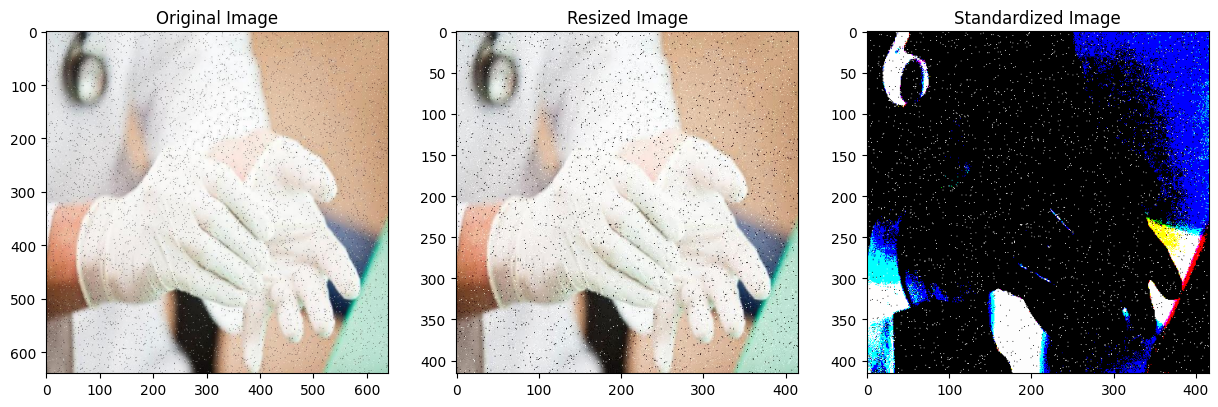

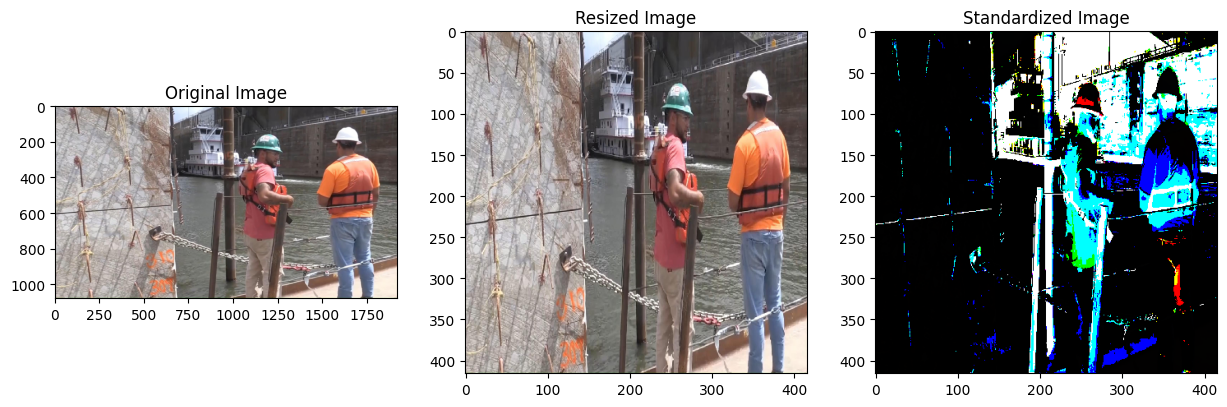

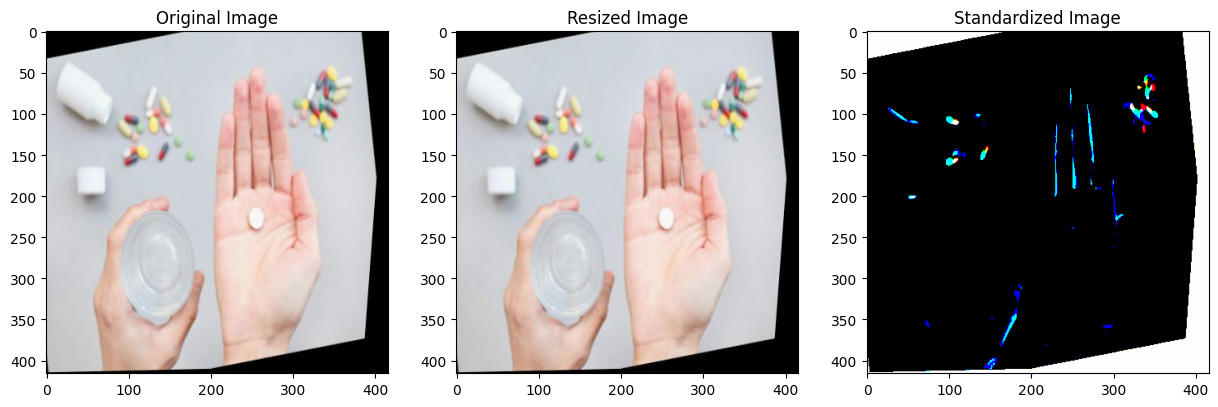

In [53]:
# Create folders if they don't exist
if os.path.exists('OriginalFolder'):
    shutil.rmtree('OriginalFolder')
os.makedirs('OriginalFolder')


# Create folders if they don't exist
if os.path.exists('ResizeFolder'):
    shutil.rmtree('ResizeFolder')
os.makedirs('ResizeFolder')

main_folder = 'OriginalFolder/'
extract_folder = 'ResizeFolder/'

# Extract the zip file to OriginalFolder
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(main_folder)

# Extract the zip file to Resize
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


all_files = []
# Walk through the folders and subfolders to find image files
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            all_files.append(os.path.join(root, file))


# Randomly select 3 image files for display
selected_files = random.sample(all_files, SET_RESIZE)

for current_imageFile in all_files:
    displayImage = 'N'
    if current_imageFile in selected_files:
        displayImage = 'Y'
    image_resize(current_imageFile, displayImage)
